# Thicket Tutorial

Thicket is a python-based toolkit for Exploratory Data Analysis (EDA) of parallel performance data that enables performance optimization and understanding of applications’ performance on supercomputers. It bridges the performance tool gap between being able to consider only a single instance of a simulation run (e.g., single platform, single measurement tool, or single scale) and finding actionable insights in multi-dimensional, multi-scale, multi-architecture, and multi-tool performance datasets.

***

# 1. Import necessary packages:

To explore the structure and various capabilities of thicket components, we begin by importing necessary packages. These include python extensions and thicket's statistical functions.

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

import hatchet as ht
import thicket as tt

# 2. Read in performance profiles

For this notebook, we select profiles generated on Lawrence Livermore National Lab(LLNL) machine, lassen. We create two thicket objects, one generated with the same problem size of 1048576 and the other generated with different problem sizes (1048576 and 4194304).   

In [ ]:
lassen1 = [f"../data/lassen/XL_BaseCuda_01048576_0{x}.cali" for x in range(1, 4)]
lassen2 = [f"../data/lassen/XL_BaseCuda_04194304_01.cali"]

# generate thicket(s)
th_lassen = tt.Thicket.from_caliperreader(lassen1)
th_obj = tt.Thicket.from_caliperreader(lassen1+lassen2)

# 3. More Information on a Function
***
You can use the help() method within Python to see the information for a given object. You can do this by typing help(object). 
This will allow you to see the arguments for the function, and what will be returned. An example is below.

In [3]:
help(tt.calc_average)

Help on function calc_average in module thicket.stats.calc_average:

calc_average(thicket=None, columns=None)
    Calculate median and mean per node.
    
    Designed to take in a Thicket, and will append a column to the statsframe for
    the median and mean calculations per node.
    
    Arguments:
        thicket (thicket): Thicket object
        columns (list): list of hardware/timing metrics to perform average calculations on



# 4. Thicket Components

## 4.1 Performance Data

The performance data table is a multi-dimensional, multi-indexed component of thicket. The rows represent nodes that each contain a different execution (i.e., profile index) of the associated call tree node. 


### View performance data table:

In [4]:
pd.set_option('display.max_rows', 500)
th_lassen.dataframe

spot.channel  \
node                                               profile                               
{'name': 'Base_CUDA', 'type': 'function'}          -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm', 'type': 'function'}          -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_MEMCPY', 'type': 'function'}   -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_MEMCPY.block_128', 'type': ... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_MEMCPY.library', 'type': 'f... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_MEMSET', 'type': 'function'}   -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_MEMSET.block_128', 'type': ... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_MEMSET.library', 'type': 'f... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_REDUCE_SUM', 'type': 'funct... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_REDUCE_SUM.block_128', 'typ... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_REDUCE_SUM.cub', 'type': 'f... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_SCAN', 'type': 'function'}     -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Algorithm_SCAN.default', 'type': 'fun... -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Apps', 'type': 'function'}               -8905822345239563018  regionprofile   
                                                   -7366047302342692617  regionprofile   
                                                    5653256069991180     regionprofile   
{'name': 'Apps_CONVECTION3DPA', 'type': 'functi... -8905822345239563018  regionprofile   
                        

## 4.2 Metadata

The metadata table stores HPC simulation information such as an application’s build settings and execution context. A row corresponds to a single execution of the application and is identified by a unique profile index.

### View metadata table:

In [5]:
display(HTML(th_lassen.metadata.to_html()))

,spot.channels,spot.options,spot.format.version,spot.timeseries.metrics,spot.metrics,cali.caliper.version,variant,Algorithm_MEMCPY,Algorithm_MEMSET,Algorithm_REDUCE_SUM,Algorithm_SORTPAIRS,Algorithm_SORT,Algorithm_SCAN,Apps_VOL3D,Apps_PRESSURE,Apps_NODAL_ACCUMULATION_3D,Apps_MASS3DPA,Apps_LTIMES_NOVIEW,Apps_LTIMES,Apps_HALOEXCHANGE_FUSED,Apps_HALOEXCHANGE,Apps_FIR,Apps_ENERGY,Apps_DIFFUSION3DPA,Apps_DEL_DOT_VEC_2D,Apps_CONVECTION3DPA,Stream_TRIAD,Stream_MUL,Stream_DOT,Stream_COPY,Stream_ADD,Polybench_MVT,Polybench_JACOBI_2D,Polybench_JACOBI_1D,Polybench_HEAT_3D,Polybench_GESUMMV,Polybench_GEMVER,Polybench_GEMM,Polybench_FLOYD_WARSHALL,Polybench_FDTD_2D,Polybench_ATAX,Polybench_ADI,Polybench_3MM,Polybench_2MM,Lcals_TRIDIAG_ELIM,Lcals_PLANCKIAN,Lcals_INT_PREDICT,Lcals_HYDRO_2D,Lcals_HYDRO_1D,Lcals_GEN_LIN_RECUR,Lcals_FIRST_SUM,Lcals_FIRST_MIN,Lcals_FIRST_DIFF,Lcals_EOS,Lcals_DIFF_PREDICT,Basic_TRAP_INT,Basic_REDUCE_STRUCT,Basic_REDUCE3_INT,Basic_PI_REDUCE,Basic_PI_ATOMIC,Basic_NESTED_INIT,Basic_MULADDSUB,Basic_MAT_MAT_SHARED,Basic_INIT_VIEW1D_OFFSET,Basic_INIT_VIEW1D,Basic_INIT3,Basic_INDEXLIST_3LOOP,Basic_INDEXLIST,Basic_IF_QUAD,Basic_DAXPY_ATOMIC,Basic_DAXPY,SizeMeaning,Tuning,systype_build,gpu_targets_block_sizes,cuda_compiler_version,Compiler_path_version,compiler,compiler_version,rajaperf_compiler_options,rajaperf_compiler,cmake_exe_linker_flags,cmake_cxx_flags,cmake_build_type,raja_version,perfsuite_version,cluster,cmdline,libraries,launchdate,user,cali.channel
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-8905822345239563018,regionprofile,,2,,"min#inclusive#sum#time.duration,max#inclusive#sum#time.duration,avg#inclusive#sum#time.duration,sum#inclusive#sum#time.duration,min#sum#sum#time.duration,max#sum#sum#time.duration,avg#sum#sum#time.duration,sum#sum#sum#time.duration",2.9.0-dev,Base_CUDA,"{'Problem size': 1048576,'Reps':100,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 16777216,'FLOPS/rep': 0}","{'Problem size': 1048576,'Reps':100,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 8388616,'FLOPS/rep': 0}","{'Problem size': 1048576,'Reps':50,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 8388616,'FLOPS/rep': 1048576}","{'Problem size': 1048576,'Reps':20,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 33554432,'FLOPS/rep': 0}","{'Problem size': 1048576,'Reps':20,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 16777216,'FLOPS/rep': 0}","{'Problem size': 1048576,'Reps':100,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 16777216,'FLOPS/rep': 1048576}","{'Problem size': 1135363,'Reps':100,'Iterations/rep': 1135363,'Kernels/rep': 1,'Bytes/rep': 36598760,'FLOPS/rep': 81746136}","{'Problem size': 1048576,'Reps':700,'Iterations/rep': 2097152,'Kernels/rep': 2,'Bytes/rep': 41943040,'FLOPS/rep': 3145728}","{'Problem size': 1030301,'Reps':100,'Iterations/rep': 1030301,'Kernels/rep': 1,'Bytes/rep': 33464144,'FLOPS/rep': 9272709}","{'Problem size': 1048500,'Reps':50,'Iterations/rep': 1048500,'Kernels/rep': 1,'Bytes/rep': 16977632,'FLOPS/rep': 42518772}","{'Problem size': 1048576,'Reps':50,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 14955008,'FLOPS/rep': 52428800}","{'Problem size': 1048576,'Reps':50,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 14955008,'FLOPS/rep': 52428800}","{'Problem size': 1030301,'Reps':50,'Iterations/rep': 187278,'Kernels/rep': 2,'Bytes/rep': 7491120,'FLOPS/rep': 0}","{'Problem size': 1030301,'Reps':50,'Iterations/rep': 187278,'Kernels/rep': 156,'Bytes/rep': 7491120,'FLOPS/rep': 0}","{'Problem size': 1048576,'Reps':160,'Iterations/rep': 1048560,'Kernels/rep': 1,'Bytes/rep': 16777088,'FLOPS/rep': 33553920}","{'Problem size': 1048576,'Reps':130,'Iterations/rep': 6291456,'Kernels/rep': 6,'Bytes/rep': 226492416,'FLOPS/rep': 57671680}","{'Problem size': 1048576,'Reps':50,'Iterations/rep': 1048576,'Kernels/rep': 1,'Bytes/rep': 57409728,'FLOPS/rep': 115752960}","{'Problem size': 1048576,'Reps'

### Filter with respect to metadata

The metadata table of a thicket helps select certain variation based on specific metadata. For example, selecting a certain compiler. In this example, we filter the metadata to select the profiles generated with a block size of `128`.

In [6]:
# selecting profiles originating form the quartz cluster
filter_metadata_func = lambda x: x['gpu_targets_block_sizes'] == "128"
th_example = th_obj.filter_metadata(filter_metadata_func)
th_example.metadata

,spot.channels,spot.options,spot.format.version,spot.timeseries.metrics,spot.metrics,cali.caliper.version,variant,Algorithm_MEMCPY,Algorithm_MEMSET,Algorithm_REDUCE_SUM,...,cmake_cxx_flags,cmake_build_type,raja_version,perfsuite_version,cluster,cmdline,libraries,launchdate,user,cali.channel
profile,,,,,,,,,,,,,,,,,,,,,
-8905822345239563018,regionprofile,,2,,"min#inclusive#sum#time.duration,max#inclusive#...",2.9.0-dev,Base_CUDA,"{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':50,'Iterations...",...,-qthreaded,Release,2022.03.0,2022.3.0,lassen,"[./my-xl-block-128-build/bin/raja-perf.exe,--v...","[/lib64/libdl.so.2,/lib64/librt.so.1,/usr/work...",1668559527,burgess9,spot
-7366047302342692617,regionprofile,,2,,"min#inclusive#sum#time.duration,max#inclusive#...",2.9.0-dev,Base_CUDA,"{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':50,'Iterations...",...,-qthreaded,Release,2022.03.0,2022.3.0,lassen,"[./my-xl-block-128-build/bin/raja-perf.exe,--v...","[/lib64/libdl.so.2,/lib64/librt.so.1,/usr/work...",1668559517,burgess9,spot
5653256069991180,regionprofile,,2,,"min#inclusive#sum#time.duration,max#inclusive#...",2.9.0-dev,Base_CUDA,"{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':50,'Iterations...",...,-qthreaded,Release,2022.03.0,2022.3.0,lassen,"[./my-xl-block-128-build/bin/raja-perf.exe,--v...","[/lib64/libdl.so.2,/lib64/librt.so.1,/usr/work...",1668559508,burgess9,spot


### Group with the metadata 

The metadata table also supports the grouping of the thicket based on the unique values present in the provided column(s). The following example groups the thicket according to any unique combination of values in the `launchdate` and `gpu_targets_block_sizes` columns.

In [7]:
# create sub-thickets from unique values in the cluster column
grouping_metadata_cols = ['launchdate', 'gpu_targets_block_sizes']
sub_thickets = th_lassen.groupby(grouping_metadata_cols)
for th in sub_thickets:
    display(th.metadata)

3  Sub-Thickets created...
[('1668559508', '128'), ('1668559517', '128'), ('1668559527', '128')]


,spot.channels,spot.options,spot.format.version,spot.timeseries.metrics,spot.metrics,cali.caliper.version,variant,Algorithm_MEMCPY,Algorithm_MEMSET,Algorithm_REDUCE_SUM,...,cmake_cxx_flags,cmake_build_type,raja_version,perfsuite_version,cluster,cmdline,libraries,launchdate,user,cali.channel
profile,,,,,,,,,,,,,,,,,,,,,
5653256069991180,regionprofile,,2,,"min#inclusive#sum#time.duration,max#inclusive#...",2.9.0-dev,Base_CUDA,"{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':50,'Iterations...",...,-qthreaded,Release,2022.03.0,2022.3.0,lassen,"[./my-xl-block-128-build/bin/raja-perf.exe,--v...","[/lib64/libdl.so.2,/lib64/librt.so.1,/usr/work...",1668559508,burgess9,spot


,spot.channels,spot.options,spot.format.version,spot.timeseries.metrics,spot.metrics,cali.caliper.version,variant,Algorithm_MEMCPY,Algorithm_MEMSET,Algorithm_REDUCE_SUM,...,cmake_cxx_flags,cmake_build_type,raja_version,perfsuite_version,cluster,cmdline,libraries,launchdate,user,cali.channel
profile,,,,,,,,,,,,,,,,,,,,,
-7366047302342692617,regionprofile,,2,,"min#inclusive#sum#time.duration,max#inclusive#...",2.9.0-dev,Base_CUDA,"{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':50,'Iterations...",...,-qthreaded,Release,2022.03.0,2022.3.0,lassen,"[./my-xl-block-128-build/bin/raja-perf.exe,--v...","[/lib64/libdl.so.2,/lib64/librt.so.1,/usr/work...",1668559517,burgess9,spot


,spot.channels,spot.options,spot.format.version,spot.timeseries.metrics,spot.metrics,cali.caliper.version,variant,Algorithm_MEMCPY,Algorithm_MEMSET,Algorithm_REDUCE_SUM,...,cmake_cxx_flags,cmake_build_type,raja_version,perfsuite_version,cluster,cmdline,libraries,launchdate,user,cali.channel
profile,,,,,,,,,,,,,,,,,,,,,
-8905822345239563018,regionprofile,,2,,"min#inclusive#sum#time.duration,max#inclusive#...",2.9.0-dev,Base_CUDA,"{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':100,'Iteration...","{'Problem size': 1048576,'Reps':50,'Iterations...",...,-qthreaded,Release,2022.03.0,2022.3.0,lassen,"[./my-xl-block-128-build/bin/raja-perf.exe,--v...","[/lib64/libdl.so.2,/lib64/librt.so.1,/usr/work...",1668559527,burgess9,spot


## 4.3 Aggregate Statistics

The aggregated statistics in a thicket is a GraphFrame. Therefore, it contains a graph and corresponding dataframe component. The table supports an order-reduction mechanism and stores processed applications’ performance. Each row of the aggregated statistics table holds data aggregated across all profiles associated with a particular call tree node. Below is an example of an empty aggregate statistics table 


### View aggregate statistics table:

In [8]:
display(HTML(th_lassen.statsframe.dataframe.to_html()))

,name
node,
"{'name': 'Base_CUDA', 'type': 'function'}",Base_CUDA
"{'name': 'Algorithm', 'type': 'function'}",Algorithm
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY
"{'name': 'Algorithm_MEMCPY.block_128', 'type': 'function'}",Algorithm_MEMCPY.block_128
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library
"{'name': 'Algorithm_MEMSET', 'type': 'function'}",Algorithm_MEMSET
"{'name': 'Algorithm_MEMSET.block_128', 'type': 'function'}",Algorithm_MEMSET.block_128
"{'name': 'Algorithm_MEMSET.library', 'type': 'function'}",Algorithm_MEMSET.library
"{'name': 'Algorithm_REDUCE_SUM', 'type': 'function'}",Algorithm_REDUCE_SUM


### Filter with respect to aggregate statistics

The aggregate statistics table also supports a filter function. In the example below, we filter the table to select the nodes with the names `Base_CUDA`, `Algorithm`, and `Stream_MUL`.

In [9]:
stats_nodes = ["Base_CUDA", "Algorithm", "Stream_MUL"]
th_stats_name = th_obj.filter_stats(lambda x: x['name'] in stats_nodes)
th_stats_name.statsframe.dataframe

,name
node,
"{'name': 'Base_CUDA', 'type': 'function'}",Base_CUDA
"{'name': 'Algorithm', 'type': 'function'}",Algorithm
"{'name': 'Stream_MUL', 'type': 'function'}",Stream_MUL


### Append the average (mean and median) of performance data

The aggregate statistics table allows users to select a column from the performance data to perform an average on the values in a column. After performing the `calc_average()` operation on said column, two new columns are appended to the statistics table with the mean and median values corresponding to the columns provided by the user. 

Below is an example where we calculate the mean and median of the values in the `sum#sum#sum#time.duration` column, which is the total exclusive time corresponding to the respective nodes.  

In [10]:
tt.calc_average(th_lassen,columns = ['sum#sum#sum#time.duration'])
display(HTML(th_lassen.statsframe.dataframe.to_html()))

,name,sum#sum#sum#time.duration_median,sum#sum#sum#time.duration_mean
node,,,
"{'name': 'Base_CUDA', 'type': 'function'}",Base_CUDA,0.000636,0.000632
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000048,0.000048
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000016,0.000016
"{'name': 'Algorithm_MEMCPY.block_128', 'type': 'function'}",Algorithm_MEMCPY.block_128,0.002440,0.002442
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.002609,0.002609
"{'name': 'Algorithm_MEMSET', 'type': 'function'}",Algorithm_MEMSET,0.000016,0.000015
"{'name': 'Algorithm_MEMSET.block_128', 'type': 'function'}",Algorithm_MEMSET.block_128,0.001488,0.001487
"{'name': 'Algorithm_MEMSET.library', 'type': 'function'}",Algorithm_MEMSET.library,0.001281,0.001279
"{'name': 'Algorithm_REDUCE_SUM', 'type': 'function'}",Algorithm_REDUCE_SUM,0.000019,0.000019


### Append the percentile of exclusive time on performance data

The aggregate statistics table allows users to select a column from the performance data to perform the `calc_percentile()` operation. This results in a new column appended to the statistics table containing the 25th, 50th, and 75th percentiles of the values in the provided column.

Below is an example where we calculate the percentiles of the values in the same `sum#sum#sum#time.duration` column.

In [11]:
tt.calc_percentile(th_lassen,columns = ['sum#sum#sum#time.duration'])
display(HTML(th_lassen.statsframe.dataframe.to_html()))

,name,sum#sum#sum#time.duration_median,sum#sum#sum#time.duration_mean,sum#sum#sum#time.duration_percentile
node,,,,
"{'name': 'Base_CUDA', 'type': 'function'}",Base_CUDA,0.000636,0.000632,"[0.0006265, 0.000636, 0.000639]"
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.000048,0.000048,"[4.6500000000000005e-05, 4.8e-05, 4.9e-05]"
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.000016,0.000016,"[1.6e-05, 1.6e-05, 1.6e-05]"
"{'name': 'Algorithm_MEMCPY.block_128', 'type': 'function'}",Algorithm_MEMCPY.block_128,0.002440,0.002442,"[0.0024395, 0.00244, 0.0024435]"
"{'name': 'Algorithm_MEMCPY.library', 'type': 'function'}",Algorithm_MEMCPY.library,0.002609,0.002609,"[0.0026085, 0.002609, 0.002609]"
"{'name': 'Algorithm_MEMSET', 'type': 'function'}",Algorithm_MEMSET,0.000016,0.000015,"[1.4999999999999999e-05, 1.6e-05, 1.6e-05]"
"{'name': 'Algorithm_MEMSET.block_128', 'type': 'function'}",Algorithm_MEMSET.block_128,0.001488,0.001487,"[0.001486, 0.001488, 0.0014889999999999999]"
"{'name': 'Algorithm_MEMSET.library', 'type': 'function'}",Algorithm_MEMSET.library,0.001281,0.001279,"[0.001278, 0.001281, 0.0012815]"
"{'name': 'Algorithm_REDUCE_SUM', 'type': 'function'}",Algorithm_REDUCE_SUM,0.000019,0.000019,"[1.8500000000000002e-05, 1.9e-05, 1.95e-05]"


### View aggregate statistics call tree:

* More explanation about the calc_average() function and the selected column `sum#sum#sum#time.duration_median` below.

In [12]:
tt.calc_average(th_lassen, columns=['sum#sum#sum#time.duration'])
print(th_lassen.statsframe.tree(metric_column='sum#sum#sum#time.duration_median'))

    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2022.2.0

0.001 Base_CUDA
├─ 0.000 Algorithm
│  ├─ 0.000 Algorithm_MEMCPY
│  │  ├─ 0.002 Algorithm_MEMCPY.block_128
│  │  └─ 0.003 Algorithm_MEMCPY.library
│  ├─ 0.000 Algorithm_MEMSET
│  │  ├─ 0.001 Algorithm_MEMSET.block_128
│  │  └─ 0.001 Algorithm_MEMSET.library
│  ├─ 0.000 Algorithm_REDUCE_SUM
│  │  ├─ 0.003 Algorithm_REDUCE_SUM.block_128
│  │  └─ 0.002 Algorithm_REDUCE_SUM.cub
│  └─ 0.000 Algorithm_SCAN
│     └─ 0.003 Algorithm_SCAN.default
├─ 0.000 Apps
│  ├─ 0.000 Apps_CONVECTION3DPA
│  │  └─ 0.003 Apps_CONVECTION3DPA.block_64
│  ├─ 0.000 Apps_DEL_DOT_VEC_2D
│  │  └─ 0.007 Apps_DEL_DOT_VEC_2D.block_128
│  ├─ 0.000 Apps_DIFFUSION3DPA
│  │  └─ 0.005 Apps_DIFFUSION3DPA.block_64
│  ├─ 0.000 Apps_ENERGY
│  │  └─ 0.039 Apps_ENERGY.block_128
│  ├─ 0.000 Apps_FIR
│  │  └─ 0.004 Apps_FIR.bl

### Use the Query Language

Thicket's query language provides users the capability to select or `query` specific nodes based on the call tree of the thicket. The performance data is then updated as part of the operation. 

**Initial call tree:** 

In [13]:
print(th_lassen.statsframe.tree('sum#sum#sum#time.duration_median'))

    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2022.2.0

0.001 Base_CUDA
├─ 0.000 Algorithm
│  ├─ 0.000 Algorithm_MEMCPY
│  │  ├─ 0.002 Algorithm_MEMCPY.block_128
│  │  └─ 0.003 Algorithm_MEMCPY.library
│  ├─ 0.000 Algorithm_MEMSET
│  │  ├─ 0.001 Algorithm_MEMSET.block_128
│  │  └─ 0.001 Algorithm_MEMSET.library
│  ├─ 0.000 Algorithm_REDUCE_SUM
│  │  ├─ 0.003 Algorithm_REDUCE_SUM.block_128
│  │  └─ 0.002 Algorithm_REDUCE_SUM.cub
│  └─ 0.000 Algorithm_SCAN
│     └─ 0.003 Algorithm_SCAN.default
├─ 0.000 Apps
│  ├─ 0.000 Apps_CONVECTION3DPA
│  │  └─ 0.003 Apps_CONVECTION3DPA.block_64
│  ├─ 0.000 Apps_DEL_DOT_VEC_2D
│  │  └─ 0.007 Apps_DEL_DOT_VEC_2D.block_128
│  ├─ 0.000 Apps_DIFFUSION3DPA
│  │  └─ 0.005 Apps_DIFFUSION3DPA.block_64
│  ├─ 0.000 Apps_ENERGY
│  │  └─ 0.039 Apps_ENERGY.block_128
│  ├─ 0.000 Apps_FIR
│  │  └─ 0.004 Apps_FIR.bl

**Queried call tree:**

In the example below, we use a thicket query that only select the parents and children nodes of `Algorithm`, maintaining the structure of the call tree.

In [14]:
alg_query = ht.QueryMatcher().match("*").rel(
    ".", lambda row: row["name"].apply(
        lambda x: re.match(
            r"Algorithm.*", x
        ) 
        is not None).all()
)
th_algorithm = th_lassen.query(alg_query)
tt.calc_average(th_algorithm, columns=['sum#sum#sum#time.duration'])
print(th_algorithm.statsframe.tree('sum#sum#sum#time.duration_median'))

    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2022.2.0

0.001 Base_CUDA
└─ 0.000 Algorithm
   ├─ 0.000 Algorithm_MEMCPY
   │  ├─ 0.002 Algorithm_MEMCPY.block_128
   │  └─ 0.003 Algorithm_MEMCPY.library
   ├─ 0.000 Algorithm_MEMSET
   │  ├─ 0.001 Algorithm_MEMSET.block_128
   │  └─ 0.001 Algorithm_MEMSET.library
   ├─ 0.000 Algorithm_REDUCE_SUM
   │  ├─ 0.003 Algorithm_REDUCE_SUM.block_128
   │  └─ 0.002 Algorithm_REDUCE_SUM.cub
   └─ 0.000 Algorithm_SCAN
      └─ 0.003 Algorithm_SCAN.default

Legend (Metric: sum#sum#sum#time.duration_median Min: 0.00 Max: 0.00)
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00

name User code    ◀  Only in left graph    ▶  Only in right graph



### Display histogram

The `display_histogram()` function allows users to select a node and metric value (a column in the performance data table) for which a histogram is generated.

Some available keyword arguments are the following,

* height: height (in inches) of each facet.
* aspect: aspect ratio of each facet, aspect * height will give you the width of each facet.
* bins: rather generic, and can set the number of bins.
* binwidth: width of each bin, overrides bins but can be used with binrange.
* binrange: lowest and highest value for bin edges; can be used either with bins or binwidth. Defaults to extremes.
* color: Set the color of the bars.

An exhaustive list of available arguments can be found [here](https://seaborn.pydata.org/generated/seaborn.displot.html).   

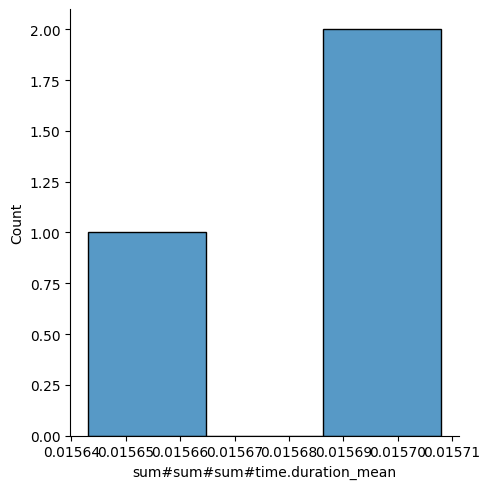

In [15]:
tt.display_histogram(th_algorithm,
                  node = "{'name': 'Base_CUDA', 'type': 'function'}",
                  metric = "sum#sum#sum#time.duration_mean")

### Display heatmap

The `display_heatmap()` function allows users to select column(s) from the performance data table, for which a heatmap is generated based on the values of the column.

Some available keyword arguments are the following: 
* vmax: maximum value to anchor the color map.
* vmin: minimum value to anchor the color map.
* linecolor: color of the lines that will divide each cell.
* linewidths: Width of the lines that will divide each cell.

An exhaustive list of available arguments can be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).  

<AxesSubplot: ylabel='node'>

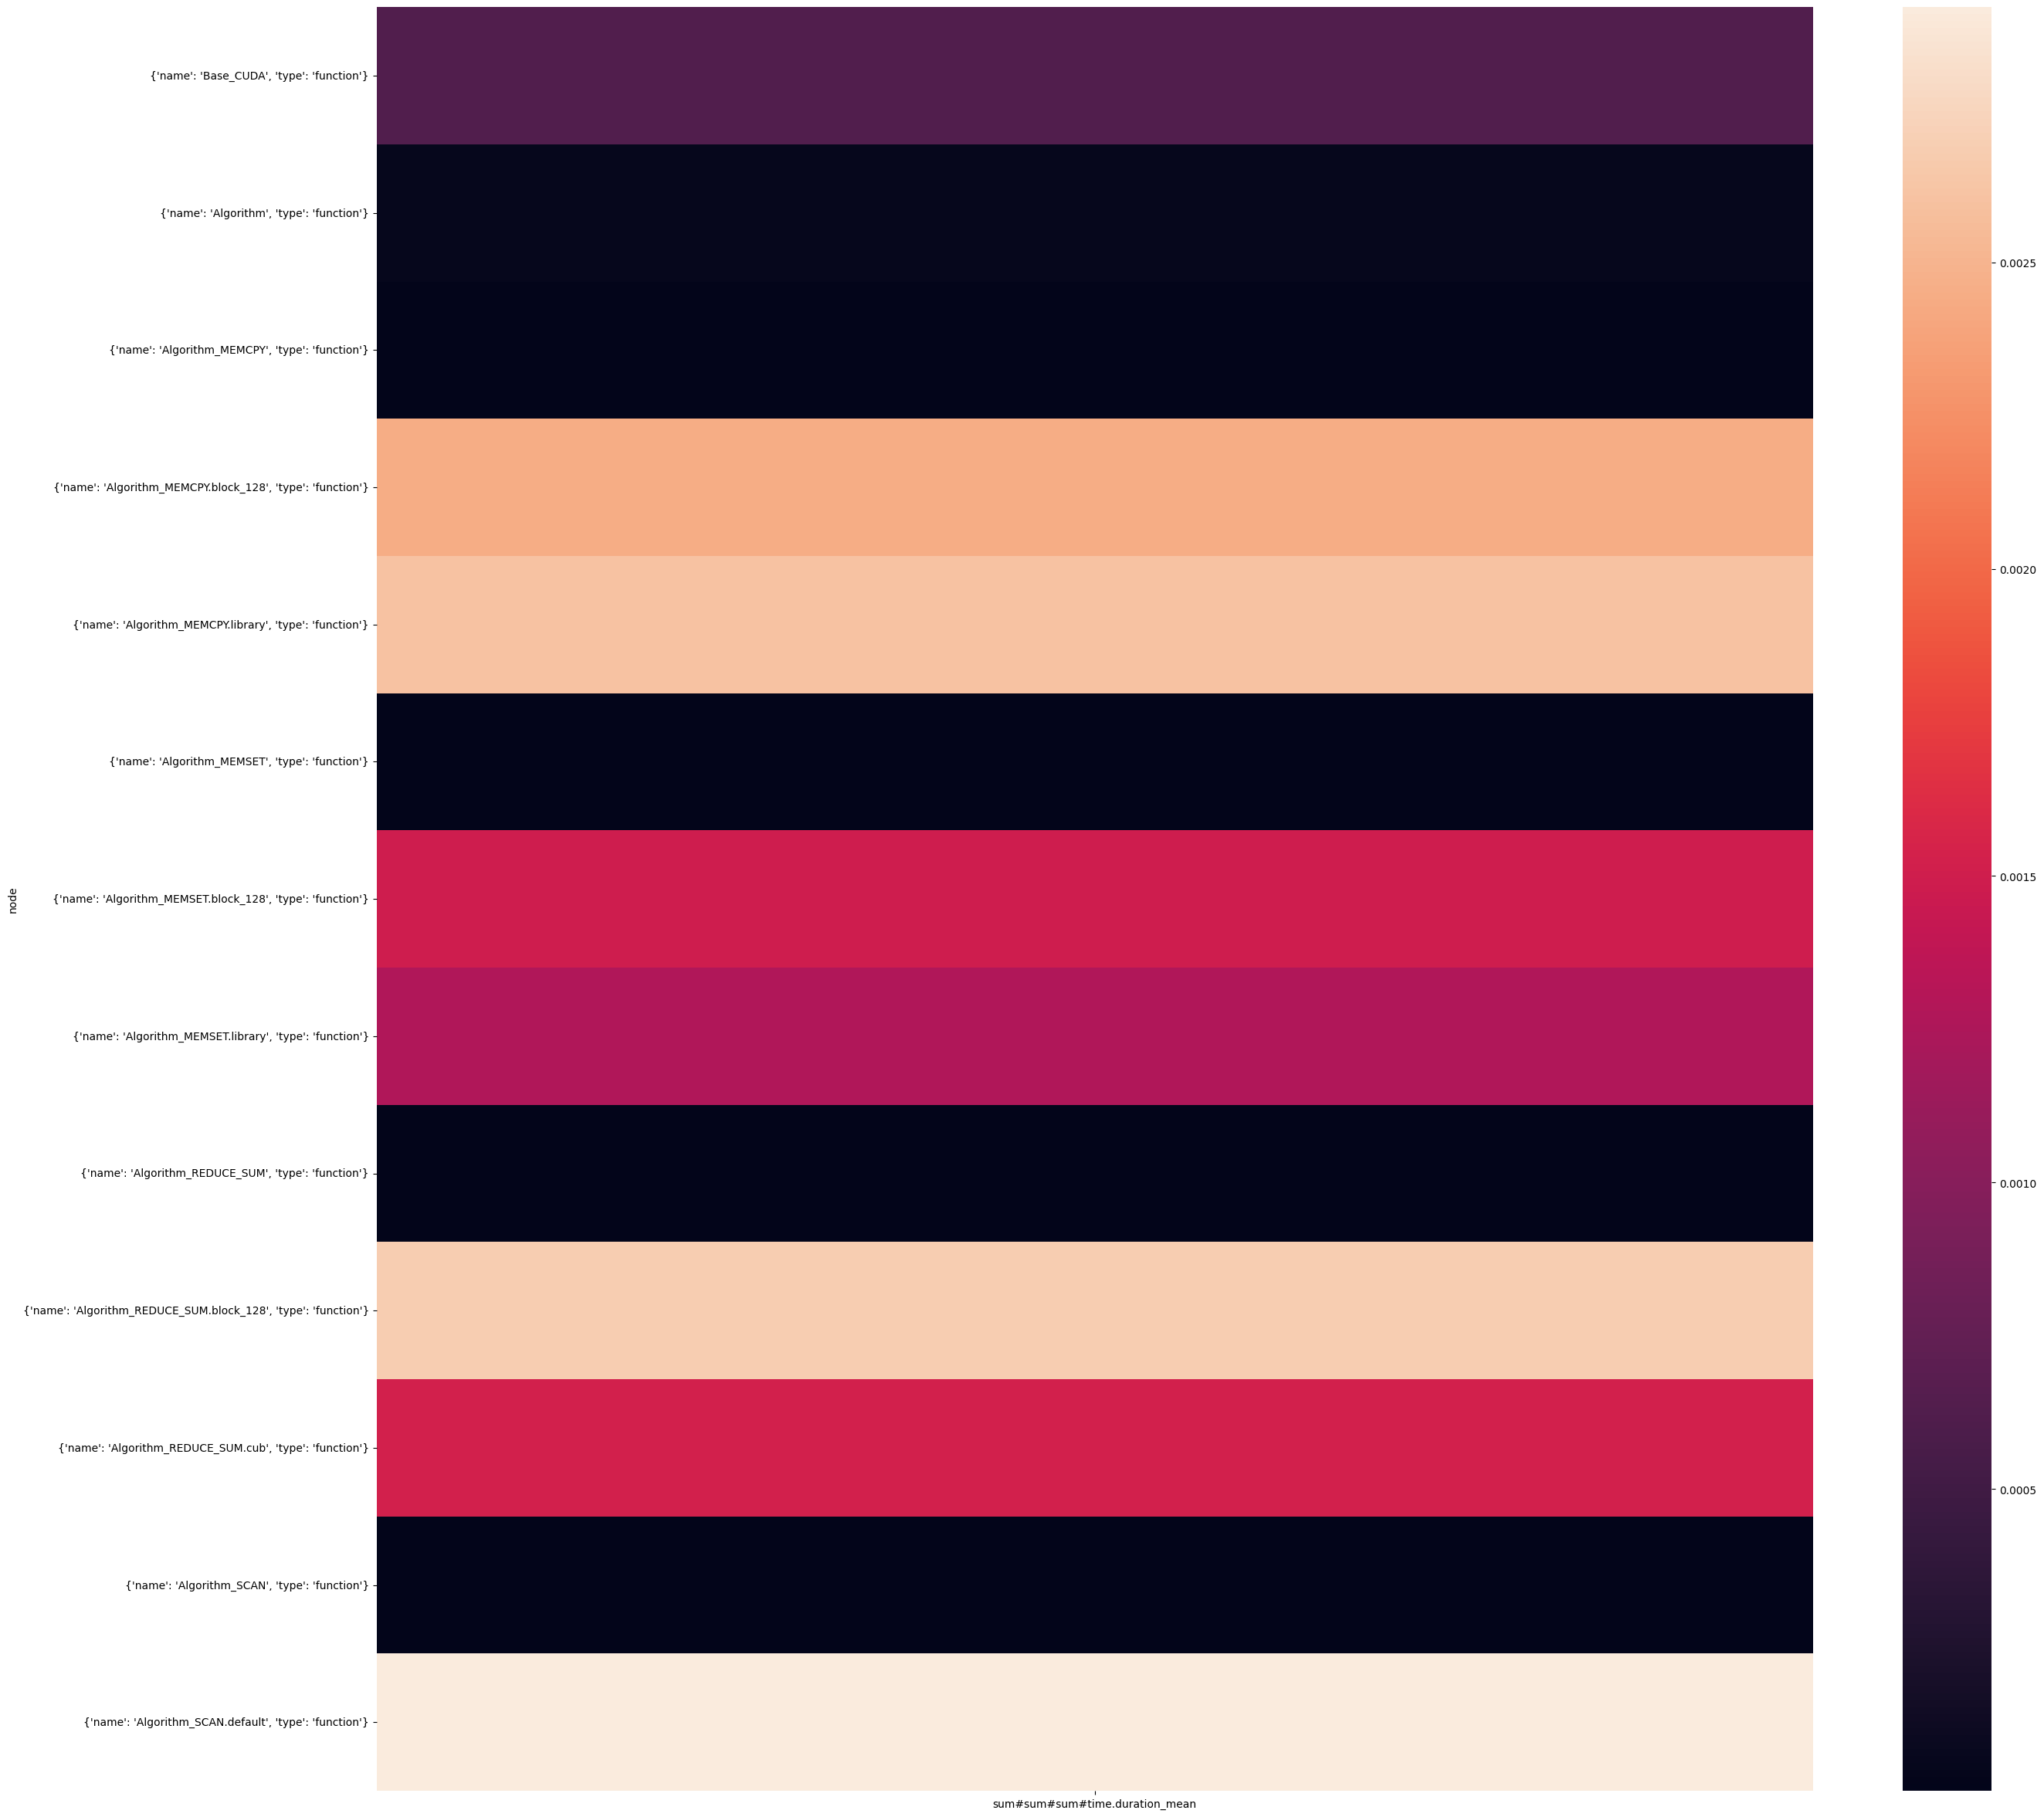

In [16]:
plt.figure(figsize = (30,30))
tt.display_heatmap(th_algorithm,columns = ["sum#sum#sum#time.duration_mean"])